# Fundamentals of Data Analysis
Project notebook for Fundamentals of Data Analysis @ GMIT - 2020

Author: Maciej Izydorek (G00387873@gmit.ie) Github: [mizydorek](https://github.com/mizydorek/Fundamentals-of-Data-Analysis-Project-2020)

***

### Assumptions

*Perform and explain simple linear regression using Python on the powerproduction dataset. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.*

#### — *Packages*

In [52]:
# Import necessary packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as lin

# plot settings
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [11,7]

# Set your custom color palette
colors = ["#212529", "#495057", "#6C757D", "#ADB5BD", "#CED4DA"]
sns.set_palette(sns.color_palette(colors))

#### — *Dataset*

In [6]:
# Import dataset 
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")

#### — *Preview of dataset*

In [31]:
# Overwiew of dataset
df.T

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
speed,0.0,0.125,0.15,0.225,0.275,0.325,0.400,0.450,0.501,0.526,...,24.499,24.525,24.575,24.65,24.75,24.775,24.85,24.875,24.95,25.0
power,0.0,0.000,0.00,0.000,0.000,4.331,5.186,3.826,1.048,5.553,...,0.000,0.000,0.000,0.00,0.00,0.000,0.00,0.000,0.00,0.0


#### — *Check dataset*

In [28]:
# checks if dataset contains any missing values 
df.isnull().sum()

speed    0
power    0
dtype: int64

In [30]:
# checks if dataset contains any missing values according to specified list
# https://stackoverflow.com/questions/43424199/display-rows-with-one-or-more-nan-values-in-pandas-dataframe
missing_values=['n/a', 'na', 'NaN', '-', ' ']
df = pd.read_csv('https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv', na_values=missing_values)
df.isna().sum()

speed    0
power    0
dtype: int64

In [ ]:
# from a quick preview of dataset can be observed that at the tail of the dataset where wind speed is max out there are zero values in power column. Let's make some plots to identify outliers. 

#### — *Plots*

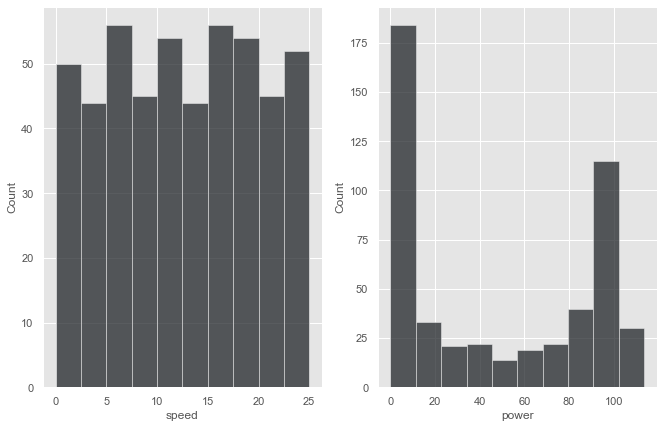

In [65]:

# cheks how the distribution looks like for speed and power column.
fig, ax =plt.subplots(1,2)
sns.histplot(data=df, x="speed", ax=ax[0]);
sns.histplot(data=df, x="power", ax=ax[1]);
# worth noting that there is a high volume of variables in a first section (0-10) of power output 


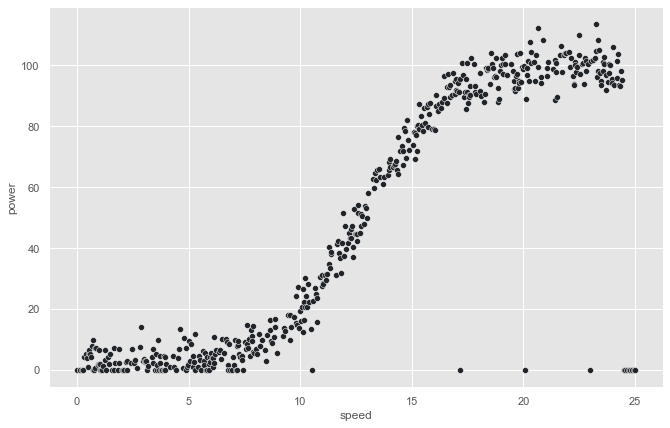

In [54]:
# Scatter plot clearly shows that we have some outliers.
sns.scatterplot(data=df, x='speed', y='power', );

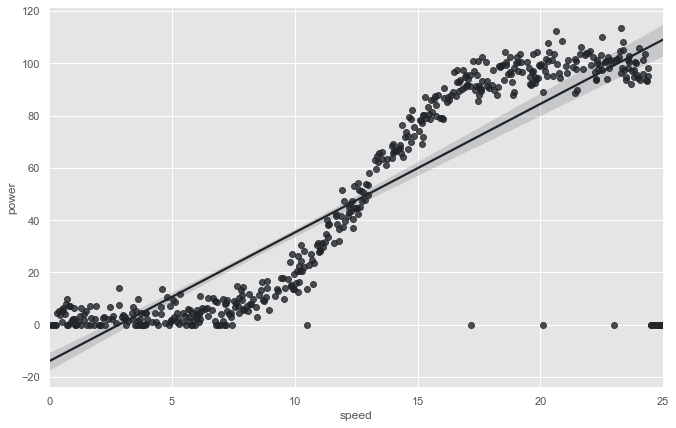

In [66]:
sns.regplot(data=df, x='speed', y='power');

### Train

In [8]:
x = df['speed'].to_numpy()
y = df['power'].to_numpy()

x = x.reshape(-1, 1)

model = lin.LinearRegression()
model.fit(x,y)
r = model.score(x,y)
p = [model.intercept_, model.coef_[0]]


In [9]:
r

0.7289360258564073

In [10]:
p

[-13.899902630519634, 4.9175956654046695]

In [11]:
def f(v, p):
    return p[0] + v * p[1]

In [12]:
f(10, p)

35.27605402352706

### References

[1] 